# Benchmarks for Water Distribution System environment

The notebook provides testing and comparison between deterministic policies and a pretrained RL agent strategies among the `WaterDistributionSystemEnv` environment.

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
%cd ../..

/Users/dave/Library/CloudStorage/OneDrive-PolitecnicodiMilano/PhD/Repositories/gym4ReaL


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datetime import datetime
from tqdm import tqdm
from collections import OrderedDict, defaultdict
from gymnasium.utils.env_checker import check_env
import gymnasium as gym

from gym4real.envs.wds.utils import parameter_generator

In [3]:
sns.set_style('darkgrid')
plot_colors = sns.color_palette()
sns.set(font_scale=1.2)

alg_color = OrderedDict({
    'random': plot_colors[0],
    'dqn': plot_colors[1]
})

alg_markers = OrderedDict({
    'random': '.',
    'dqn': '*',
})

alg_labels = {
    'random': 'Random',
    'dqn': 'DQN',
}

In [14]:
n_episodes = 10
rewards = defaultdict(dict)

## Random Policy
The action is chosen randomly at each decision step.

In [15]:
params = parameter_generator(hydraulic_step=600, duration=3600*24*7, seed=42)
env = gym.make(id="gym4real/wds-v0", **{'settings':params})

/Users/dave/miniconda3/envs/osx-64/lib/python3.12/site-packages/gymnasium/spaces/box.py:235: UserWarning: WARN: Box low's precision lowered by casting to float32, current low.dtype=float64
  gym.logger.warn(
/Users/dave/miniconda3/envs/osx-64/lib/python3.12/site-packages/gymnasium/spaces/box.py:305: UserWarning: WARN: Box high's precision lowered by casting to float32, current high.dtype=float64
  gym.logger.warn(


In [16]:
alg = 'random'
rewards[alg] = {}

for episode in tqdm(range(n_episodes)):
    obs, info = env.reset(options={'is_evaluation': True})
    done = False
    rewards[alg][episode] = {}
    rewards[alg][episode]['pure'] = []

    while not done:
        action = env.action_space.sample()  # Randomly select an action
        obs, reward, terminated, truncated, info = env.step(action)  # Return observation and reward
        done = terminated or truncated
        rewards[alg][episode]['pure'].append(list(info['pure_rewards'].values()))

 60%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                             | 6/10 [05:09<03:21, 50.33s/it]/Users/dave/Library/CloudStorage/OneDrive-PolitecnicodiMilano/PhD/Repositories/gym4ReaL/gym4real/envs/wds/simulator/epynet/epanet2.py:683: UserWarning: WARNING: Pumps cannot deliver enough flow or head.
  warnings.warn(self.ENgeterror(ierr))
100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [08:43<00:00, 52.40s/it]


## DQN Agent

In [17]:
# Uncomment this line to install stable-baselines3
#!pip install stable-baselines3

In [ ]:
from stable_baselines3 import DQN
from stable_baselines3.common.env_util import make_vec_env
from gym4real.envs.wds.env import WaterDistributionSystemEnv

In [ ]:
params = parameter_generator(hydraulic_step=600, duration=3600*24*7, seed=42)
env = make_vec_env('gym4real/wds-v0', n_envs=4, env_kwargs={'settings':params})

In [1]:
model = DQN("MlpPolicy", env)
model.learn(total_timesteps=env.get_attr('_duration')[0] / 600 * n_episodes, 
            progress_bar=True)
model.save('examples/wds/DQN_quick')

NameError: name 'DQN' is not defined

In [18]:
alg = 'ppo'
rewards[alg] = []

model = PPO(MlpPolicy, env, verbose=1)
vec_env = model.get_env()
model = PPO.load("examples/microgrid/PPO_quick")
vec_env.set_options({'eval_profile': test_profile})
obs = vec_env.reset()
print("Initial observation", obs)

done = False
while not done:
    action, _states = model.predict(obs)
    obs, r, dones, info = vec_env.step(action)
    done = dones[0]
    rewards[alg].append(info[0]['cumulated_reward'])

AttributeError: module 'gymnasium' has no attribute 'make_vec_env'

## Comparison between the different baselines

In [14]:
def plot_cum_rewards(res: dict, algs: list, sampling_rate=1):
    data = {}
    fig, ax = plt.subplots(1, 1, figsize=(12, 4), tight_layout=True)
    
    for i, alg in enumerate(algs):
        ax.plot(res[alg][::sampling_rate], label=alg, color=alg_color[alg], marker=alg_markers[alg], markevery=500)        
        ax.legend()

In [46]:
algs_to_compare = ['random', 'only_market', 'battery_first', '50-50', 'ppo']

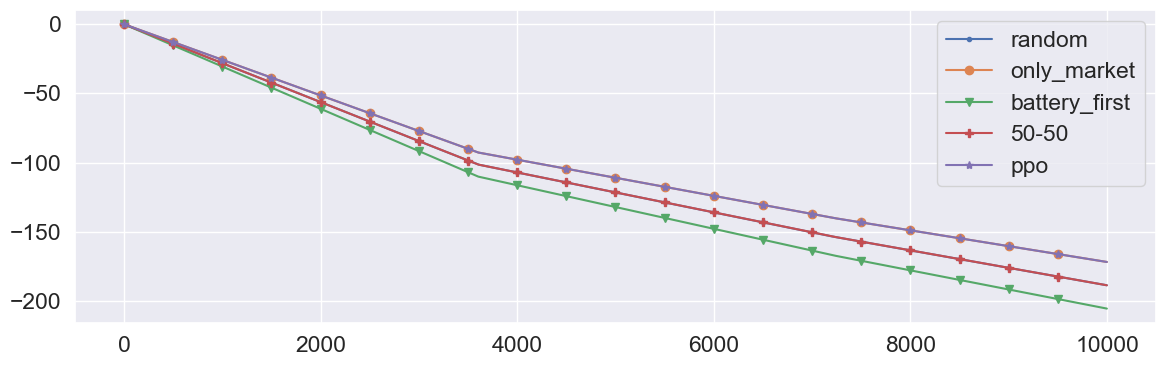

In [47]:
plot_cum_rewards(res=rewards, algs=algs_to_compare)